# Phase 1 Project

This project marks the end of Phase 1 part of the Moringa Data Science Program.
In it, we have been given a data set to analyse with several expectations as below:

## 1. Overview

This overview has been borrowed from the Canvas assignment:

Our company is planning to diversify into the aviation business and plans to purchase and operate aircrafts for both commercial and private enterprises. Since the industry carries a lot of safety, financial and operational risks, the leadership wants to identify which aircraft models have the lowest risk investment while balancing safety, reliability and cost-effectiveness.

## 2. Business Understanding

Our company aims to:

### Objectives:

To determine:

1. Different aircraft make and models and categorize based on aircraft category and purpose of flight.

Within each category, to determine the relation between Airplane Make and:

2.  Operational cost effectiveness (Engine type).

3. Safety risk (injury severity, total fatal injuries, total serious injuries). 

4. Mechanical reliability and environmental susceptibility of the aircraft (aircraft damage).


To determine success, this will be measured by delivering clear data presenting recommendations to guide procurement of the most suitable Aircraft Makes.
 

## 3. Data Understanding

### Data Source
The data we will be using was sourced from the National Transportation Safety Board.

### Data Description
The data includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters and it captures the following:

Event.Id

Investigation.Type

Accident.Number

Event.Date

Location

Country

Latitude

Longitude

Airport.Code

Airport.Name

Injury.Severity

Aircraft.damage

Aircraft.Category

Registration.Number

Make

Model

Amateur.Built

Number.of.Engines

Engine.Type

FAR.Description

Schedule

Purpose.of.flight

Air.carrier

Total.Fatal.Injuries

Total.Serious.Injuries

Total.Minor.Injuries

Total.Uninjured

Weather.Condition

Broad.phase.of.flight

Report.Status

Publication.Date


This marks the end of the Data Preparation and Cleaning. 

## 4. Data analysis

We will need several libraries for the following purposes:

1. Pandas - to read, edit and save our python files.
2. Numpy - for statistical computations for measures of central tendency and dispersion.
3. Matplotlib and seaborn - for visualizations.

### 4.1 Data Preparation

We shall first start off with data cleaning

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read into our aviation csv data using pandas and save it as variable name - aviation_data

aviation_data = pd.read_csv('Aviation_Data.csv')

c:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# read into our first 5 rows to understand how the data is organized
aviation_data.head()

# lets look at the columns we have to define further our data requirements
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [4]:
#let us check the total length of the data frame, rows, columns and missing entries
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null


The dataset had a total of 90,348 rows (entries) and 31 columns. 
Out of the many columns in the previous cell, we need to define the ones we will be using for our analysis.
The project expects us to determine the best aircraft based on accidents profile. Therefore the following columns may be necessary.
Out of the 31 columns, we have selected the 12 below to answer our objectives that were listed above:

1. Event Date 
2. Total Fatal Injuries
3. Total Serious Injuries
4. Total minor injuries
5. Injury Severity
6. Aircraft Damage
7. Make - type of aircraft
8 Model - type of the model of the make
9. Engine type
10. Aircraft Category 
11. Purpose of flight
12. Air carrier



In [5]:
# let us create a variable name 'selected_columns' which has the columns we purposefully selected for this assignment
selected_columns = ['Event.Date', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model', 'Engine.Type',
'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries']

In [6]:
# let us re-create our aviation_data dataset with only the selected columns:
aviation_data = aviation_data[selected_columns]

In [7]:
# let us check out the column names to confirm that we only have the selected columns as well as the fact that they should be only 12
aviation_data.columns, len(aviation_data.columns)

(Index(['Event.Date', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
        'Make', 'Model', 'Engine.Type', 'Purpose.of.flight', 'Air.carrier',
        'Total.Fatal.Injuries', 'Total.Serious.Injuries',
        'Total.Minor.Injuries'],
       dtype='object'),
 12)

#### Handling missing data

In [8]:
# let us go through each of the selected columns again and determine their data types and how many missing values they have
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Injury.Severity         87889 non-null  object 
 2   Aircraft.damage         85695 non-null  object 
 3   Aircraft.Category       32287 non-null  object 
 4   Make                    88826 non-null  object 
 5   Model                   88797 non-null  object 
 6   Engine.Type             81812 non-null  object 
 7   Purpose.of.flight       82697 non-null  object 
 8   Air.carrier             16648 non-null  object 
 9   Total.Fatal.Injuries    77488 non-null  float64
 10  Total.Serious.Injuries  76379 non-null  float64
 11  Total.Minor.Injuries    76956 non-null  float64
dtypes: float64(3), object(9)
memory usage: 8.3+ MB


In [9]:
# Before we can do an analysis on our data, we first need to fill in the missing values based on the type of data.
# We have 5 columns that are float data type (numeric) and 11 that are object (non-numeric)
# Let us create a for loop to determine how many missing values first in the float64 columns:
for column in aviation_data.columns:
    if aviation_data[column].dtype == 'float64':
        print (column, aviation_data[column].isna().sum())

Total.Fatal.Injuries 12860
Total.Serious.Injuries 13969
Total.Minor.Injuries 13392


In [10]:
# let us do the same but now for the object column:
for object_column in aviation_data.columns:
    if aviation_data[object_column].dtype == 'object':
        print (object_column, aviation_data[object_column].isna().sum())

Event.Date 1459
Injury.Severity 2459
Aircraft.damage 4653
Aircraft.Category 58061
Make 1522
Model 1551
Engine.Type 8536
Purpose.of.flight 7651
Air.carrier 73700


In [11]:
# Now that we have both the numeric as well as the non numeric information with missing values
# Let us first start by filling in the missing values in the numeric column.
# We will begin by first getting the measures of central tendencies of the data

aviation_data.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
count,77488.000000,76379.000000,76956.000000
mean,0.647855,0.279881,0.357061
std,5.485960,1.544084,2.235625
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,349.000000,161.000000,380.000000


In [12]:
# For the remaining numerical data, they have wide range of observations between 0 to maximum, therefore the 'mean' might not be the best measure of central tendency. 
# Let us look at the median
# using a for loop

for column in aviation_data.columns:
    if aviation_data[column].dtype == 'float64':
        print (column, aviation_data[column].median())

Total.Fatal.Injuries 0.0
Total.Serious.Injuries 0.0
Total.Minor.Injuries 0.0


In [13]:
# It looks like in many injuries, the majority of the number of injuries per accident were not as high. Let us see this with the help of a boxplot for each of the numerical data
# let us create a function that will do this for each of the numeric data

def box_plot_data(column):
    """
    Plots a box plot of the column so that we can visually see the spread of the data to better make sense of the low mean and median values we are getting
    """
    return sns.boxplot(column)
    
    

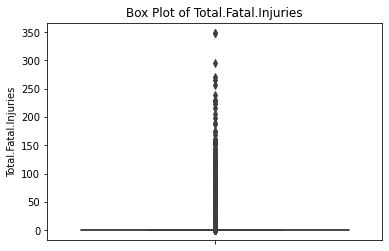

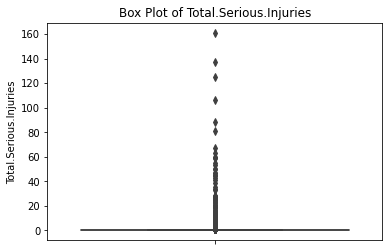

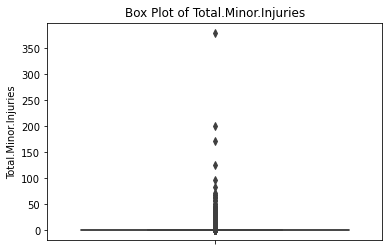

In [14]:
# let us employ the 'box_plot_data' function in a for loop

for column in aviation_data.columns:
    if aviation_data[column].dtype == 'float64':
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=aviation_data[column])
        plt.title(f"Box Plot of {column}")
        plt.show()

In [15]:
# The boxplots shown above have alot of outlier values. In our filling of missing values THEN, we will not opt to drop out our values, since each accident matters.
# We will not opt to fill with mean since outliers might inflate the mean
# We will therefore fill in with the median instead 
# Again, we will use a for loop and set argument inplace = True to save our changes in the dataframe.

for column in aviation_data.columns:
    if aviation_data[column].dtype == 'float64':
        aviation_data[column].fillna(aviation_data[column].median(), inplace = True)
    

In [16]:
# Let us confirm that we have filled in our missing numerical values with their medians and that there are no other missing values
for column in aviation_data.columns:
    if aviation_data[column].dtype == 'float64':
        print(column, aviation_data[column].isna().sum())

Total.Fatal.Injuries 0
Total.Serious.Injuries 0
Total.Minor.Injuries 0


In [17]:
# let us now go back to the categorical columns which also had missing values
# copying the code we used:

for object_column in aviation_data.columns:
    if aviation_data[object_column].dtype == 'object':
        print (object_column, aviation_data[object_column].isna().sum())

Event.Date 1459
Injury.Severity 2459
Aircraft.damage 4653
Aircraft.Category 58061
Make 1522
Model 1551
Engine.Type 8536
Purpose.of.flight 7651
Air.carrier 73700


In [18]:
# our total data length was 90,348. Some of our categorical values seem to be largely missing such as: Air carrier (73700) and schedule (77766) as well as aircraft category (58061).
# Despite the fact that all accidents matter, trying to fill in these missing values might affect the overall interpretation of data. However dropping them might also lead to attrition bias, where we have lost too much data.
# We will therefore opt to fill in the columns with less than 10% missing values with mode but drop all the columns with more than 10% missing values

for object_column in aviation_data.columns:
    if aviation_data[object_column].dtype == 'object':
        if aviation_data[object_column].isna().sum() < 9035:
            aviation_data[object_column].fillna(aviation_data[object_column].mode()[0], inplace = True)
        else:
            aviation_data.dropna(subset = [object_column], inplace = True)



In [19]:
# let us confirm that our missing categorical values are dropped and that there are no missing values
for object_column in aviation_data.columns:
    if aviation_data[object_column].dtype == 'object':
        print (object_column, aviation_data[object_column].isna().sum())

Event.Date 0
Injury.Severity 0
Aircraft.damage 0
Aircraft.Category 0
Make 0
Model 0
Engine.Type 0
Purpose.of.flight 0
Air.carrier 0


In [20]:
# let us now check the number of entries we are working with:
len(aviation_data) # unfortunately, we have dropped from 90348 entries to 3488 due to the missing entries in the non-numerical columns

13625

#### Handling Duplicates

In [21]:
# Before we wind up on Data cleaning and go on to analysis, let us check if there are duplicates and drop them 

aviation_data.duplicated().sum()

# there are only 3 duplicate entries. We opt to drop them

aviation_data.drop_duplicates(inplace = True)

# let us recheck that duplicates are dropped
aviation_data.duplicated().sum() # The duplicates are all dropped.


0

#### Standardize and confirm uniqueness of value counts of Categorical Variables

In [22]:
# Let us check the output of value counts in the categorical variables using a for loop
for object_column in aviation_data.columns:
    if aviation_data[object_column].dtype == 'object':
        print (object_column, '', aviation_data[object_column].value_counts())

Event.Date  2011-06-18    15
2012-08-31    13
2011-07-23    12
2011-08-13    12
2011-04-10    11
              ..
1982-11-23     1
2017-03-06     1
2017-11-10     1
2022-01-03     1
2021-10-11     1
Name: Event.Date, Length: 4953, dtype: int64
Injury.Severity  Non-Fatal    10850
Fatal         2478
Minor           88
Incident        77
Serious         76
Fatal(1)        17
Fatal(2)        16
Fatal(3)         6
Fatal(4)         6
Fatal(6)         2
Fatal(8)         2
Fatal(13)        1
Fatal(65)        1
Fatal(10)        1
Fatal(5)         1
Fatal(27)        1
Fatal(9)         1
Name: Injury.Severity, dtype: int64
Aircraft.damage  Substantial    11586
Destroyed       1323
Minor            675
Unknown           40
Name: Aircraft.damage, dtype: int64
Aircraft.Category  Airplane             11266
Helicopter            1914
Glider                 190
Balloon                 97
Weight-Shift            65
Powered Parachute       40
Gyrocraft               36
Ultralight               8
WSFT    

In [23]:
# from the above output, the value_counts of the 'injury-severity' has too many 'Fatal' outputs that can be merged into one fatal output.
# Let us use the .replace() function to do this.

aviation_data['Injury.Severity'] = aviation_data['Injury.Severity'].replace(
    to_replace=r'Fatal.*', 
    value='Fatal', 
    regex=True,
)


In [24]:
# Let us confirm that we have converted all 'Fatals' into one.
aviation_data['Injury.Severity'].value_counts()

Non-Fatal    10850
Fatal         2533
Minor           88
Incident        77
Serious         76
Name: Injury.Severity, dtype: int64

In [25]:
# In the aviation['data'] Cessna is represented twice as cessna (in small letters) and CESSNA (in capital letters) as well as BOEING and boeing
# Let us also edit the value_counts of these outputs by first stripping all the letters in the words then making onlt the first letter Capital.

aviation_data['Make'] = aviation_data['Make'].astype(str).str.strip().str.title()

In [26]:
# Note that the data on purpose of flight has a lot of unknown values (2864)

#Remove rows where Purpose.of.flight is "Unknown"

aviation_data = aviation_data[aviation_data['Purpose.of.flight'].str.upper() != 'UNKNOWN']

# Check the result
aviation_data['Purpose.of.flight'].value_counts()   # we have removed the large number of unknown values  

Personal                     8241
Instructional                1961
Aerial Application            884
Business                      388
Positioning                   353
Other Work Use                277
Aerial Observation            231
Flight Test                   146
External Load                  95
Executive/corporate            85
Skydiving                      81
Public Aircraft - Federal      74
Ferry                          67
Banner Tow                     61
Public Aircraft - Local        59
Public Aircraft - State        47
Air Race show                  43
Public Aircraft                36
Glider Tow                     34
Firefighting                   28
Air Drop                        6
PUBS                            3
ASHO                            2
PUBL                            1
Name: Purpose.of.flight, dtype: int64

### 4.2 Data Analysis

Now we can start the data analysis. In this section we aim to reiterate the objectives and do a:

1. Summary in measures of central tendency of both numerical (means and medians) as well as categorical variables (in value counts). 

2. Do several plots (in line with the objectives) showing relation between:

** Different aircraft make and purpose of flight

** Different aircraft make and operational cost effectiveness: Engine type

** Different aircraft make and Safety risk of the aircraft (injury severity, total fatal injuries, total serious injuries)

** Different aircraft make and Mechanical reliability and environmental susceptibility of the aircraft (aircraft.damage)

#### Objective 1: Summary in measures of central tendency of both numerical (means and medians) as well as categorical variables (in value counts). 

In [27]:
# Summary data on the numerical data using a for loop

for column in aviation_data.columns:
    if aviation_data[column].dtype == 'float64':
        print(aviation_data[column].describe(), aviation_data[column].median(), aviation_data[column].mode())



count    13203.000000
mean         0.628418
std          6.231879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        295.000000
Name: Total.Fatal.Injuries, dtype: float64 0.0 0    0.0
dtype: float64
count    13203.00000
mean         0.35242
std          2.73809
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max        161.00000
Name: Total.Serious.Injuries, dtype: float64 0.0 0    0.0
dtype: float64
count    13203.000000
mean         0.200182
std          0.889941
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         50.000000
Name: Total.Minor.Injuries, dtype: float64 0.0 0    0.0
dtype: float64


From this numerical summary, we had 3485 accidents.

1. Most aircrafts had 1 engine.

2. The mean number of total Fatal injuries was 1.7 (+/- 13.6).

3. The mean number of total Serious injuries was 0.68 (+/- 5.32).

4. The mean number of total Minor injuries was  0.57 (+/- 7.57).

5. The mean number of total Uninjured was 35.5 (+/- 74.7).

In [28]:
# Summary data for the categorical data.

for object_column in aviation_data.columns:
    if aviation_data[object_column].dtype == 'object':
        print(aviation_data[object_column].value_counts())

2011-06-18    15
2012-08-31    13
2011-08-13    12
2011-07-23    12
2011-06-23    11
              ..
2010-01-31     1
2011-11-06     1
2009-04-06     1
2009-01-11     1
2021-03-31     1
Name: Event.Date, Length: 4746, dtype: int64
Non-Fatal    10644
Fatal         2376
Minor           87
Serious         76
Incident        20
Name: Injury.Severity, dtype: int64
Substantial    11329
Destroyed       1212
Minor            622
Unknown           40
Name: Aircraft.damage, dtype: int64
Airplane             10937
Helicopter            1823
Glider                 190
Balloon                 97
Weight-Shift            65
Powered Parachute       40
Gyrocraft               36
Ultralight               7
WSFT                     3
Unknown                  2
UNK                      1
Blimp                    1
Rocket                   1
Name: Aircraft.Category, dtype: int64
Cessna              3179
Piper               1711
Boeing               828
Beech                628
Bell                 469
   

In [29]:
# let us also use a for loop to print out all aircraft Makes that had the least log in (meaning they were less likely reported to have an accident)

# Count how many times each aircraft make appears
make_counts = aviation_data['Make'].value_counts()

# Create a list to append our airplanes to. We will use this list later on to see planes that had least crashes but also shared other attributes
safe_planes = []

# Loop through the makes
for plane, count in make_counts.items():
    #print(f"{plane}: {count}")
    # Example: only print makes that appear less than 2 times
    if count < 2:
        safe_planes.append(plane)
        print(f"Aircraft with less crashes: {plane}")


Aircraft with less crashes: Vertical Unlimited Llc
Aircraft with less crashes: Spaulding Errol
Aircraft with less crashes: C A S A
Aircraft with less crashes: Giboney
Aircraft with less crashes: Ferdon
Aircraft with less crashes: Claus Rodney L
Aircraft with less crashes: Johnny F Anderson
Aircraft with less crashes: National Ballooning Ltd
Aircraft with less crashes: Huebbe
Aircraft with less crashes: Lewis Brandon Scott
Aircraft with less crashes: Kidd Chris
Aircraft with less crashes: Alexander
Aircraft with less crashes: Glines
Aircraft with less crashes: Muffett
Aircraft with less crashes: Honda Jet
Aircraft with less crashes: Murray Richard F
Aircraft with less crashes: Aerostar Acft Corp Of Texas
Aircraft with less crashes: Ertz Mark G
Aircraft with less crashes: Cismowski
Aircraft with less crashes: Apollo
Aircraft with less crashes: Downer
Aircraft with less crashes: Nuse George
Aircraft with less crashes: Bertagna John
Aircraft with less crashes: Mckenna James E
Aircraft with

In [30]:
# Confirming that we have made a list of safe planes - with the least crashes
print(safe_planes)

['Vertical Unlimited Llc', 'Spaulding Errol', 'C A S A', 'Giboney', 'Ferdon', 'Claus Rodney L', 'Johnny F Anderson', 'National Ballooning Ltd', 'Huebbe', 'Lewis Brandon Scott', 'Kidd Chris', 'Alexander', 'Glines', 'Muffett', 'Honda Jet', 'Murray Richard F', 'Aerostar Acft Corp Of Texas', 'Ertz Mark G', 'Cismowski', 'Apollo', 'Downer', 'Nuse George', 'Bertagna John', 'Mckenna James E', 'Flugzeugproduktions-Und Vertri', 'Owens', 'Erick Magno & Assoc Pa', 'Chicco', 'Leroux John F', 'Aero Smart Solutions Inc', 'Univair Aircraft Corporation', 'Douglas D. Turner', 'Wohaska John', 'Kitty Hawk', 'Prendergast John/Vans', 'Crabtree', 'Texas Helicopter Corporation', 'Johnson Garret W', 'Engineering And Research', 'Ohlgren Brent E', 'Krips Jack E Jr', 'Vanderhoof Steve', 'Extra Flugzeugbau', 'Worley Dennis', 'Warth Dennis J', 'Ttx Air Llc', 'Ludwig Larry E', 'Aviocar Casa', 'Nagel', 'Hoskins', 'Kostrazewa Andre', 'Kennedy Michael M', 'Lawson Ronald S', 'Taylorcraft Aviation Corp.', 'Ison Aircraft'

From the summary data on the categorical variables:

1. Most crashes were non-fatal (2700) while the 2nd most crashes were fatal (500).

2. Most injury severity to the aircraft was substantial (2449), destroyed (517) or minor (514).

3. Most aircrafts were airplanes (2987), followed by helicopter (475) and balloon (11).

4. Most aircraft make involved in accidents were: Boeing  (834), Cessna (538), Piper (249) then Airbus (207). Many other aircrafts as shown in the output above had less than 2 crashes. This means that they had the least number of crashes that could be interpreted as a safe aircraft.

5. The most common aircraft model was the 737 (218), A£320 (61), 208B (58), 747 (51), 777 (46)

6. The most common engine type was reciprocating (1961), tubro fan (686), turbo prop (318), turbo shaft (298).

7. The purpose for majority of the flights was unknown (2864) but of the known, they were for personal (211), aerial application (193) and business (61)

8. American airlines operated the largest fleet (1008), followed by South West Airlines (41) , Delta Airlines (37) and United Airlines (37)

#### Objective 2.1: Relation between different aircraft make and purpose of flight 

In [31]:
# we will first save the common purposes as variable name 'common purposes' to include selected purposes [Personal, Business, Other Work Use, Executive, Public Aircraft (local), Public Aircraft (State)]
# Define the selected purposes
# Define the selected purposes
selected_purposes = [
    'Personal', 
    'Business',  
    'Other Work Use', 
    'Executive/corporate', 
    'Public Aircraft - Local', 
    'Public Aircraft - State'
]

# Filter dataset for only these purposes
filtered_data = aviation_data[aviation_data['Purpose.of.flight'].isin(selected_purposes)]

# Group by purpose and show all unique aircraft makes per purpose
aircraft_examples_by_purpose = (
    filtered_data.groupby('Purpose.of.flight')['Make']
    .unique()
    .apply(list)  # convert array to list for display
)

# Ensure full column content is visible
pd.set_option('display.max_colwidth', None)

# Display the results
aircraft_examples_by_purpose




Purpose.of.flight
Business                   [Cessna, Beech, Robinson, Beechcraft, Piper, Robinson Helicopter Company, Eclipse Aviation Corporation, Mkii Corporation, Piper Cub Crafters, Taylorcraft Aviation, Raytheon Company, Dehavilland, Bell, Hughes, Socata, Agusta, Hubbell, Robinson Helicopter, Dassault Falcon, Smith, Cirrus Design Corp, Mitsubishi, Pridmore, Hawker Beechcraft, Hawker, Siai-Marchetti, Grumman, Lancair, Bombardier Inc, Hiller, Dassault-Breguet, Stinson, Siai Marchetti, Ludwig Larry E, Cirrus Design Corp., Sikorsky, Rice Leo B, Aero Vodochody, Bellanca, Embraer, Schoepflin, Aerospatiale, Grumman Aircraft Eng Corp, Raytheon Aircraft Company, Cirrus Design Corporation, New Piper Aircraft Inc, Hawker Beechcraft Corporation, Eurocopter, Piaggio, Air Tractor Inc, Ultramagic Sa, Ultramagic, Aero Commander, Yuneec, Mcdonnell Douglas Helicopter, Raytheon, Cameron Balloons Us, Klaas Development Inc, Burton, Flight Design Gmbh, G-Dawg Llc, Raytheon Corporate Jets Inc, Balony K

<ipython-input-32-7cb7a2c05d98>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


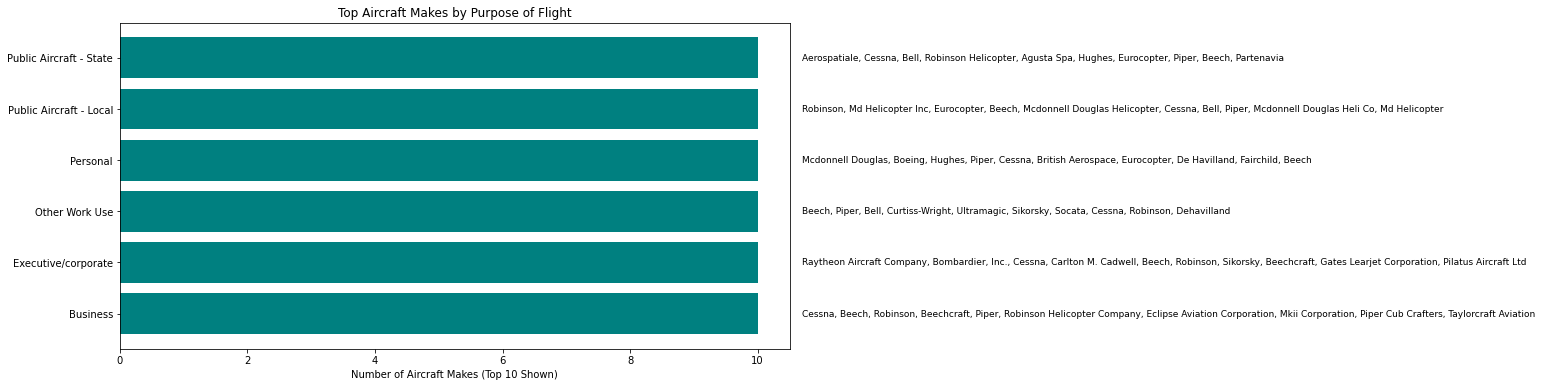

In [32]:
# Illustrate our findings in a horizontal bar graph (but since the figure is huge, we will plot the first 10 aircrafts based on purpose)

plt.figure(figsize=(12,6))
for i, purpose in enumerate(aircraft_examples_by_purpose.index):
    top_aircrafts = aircraft_examples_by_purpose[purpose][:10]  # only first 10
    plt.barh(i, len(top_aircrafts), color='teal')
    plt.text(len(top_aircrafts)+0.7, i, ', '.join(top_aircrafts), va='center', fontsize=9)

plt.yticks(range(len(aircraft_examples_by_purpose)), aircraft_examples_by_purpose.index)
plt.xlabel("Number of Aircraft Makes (Top 10 Shown)")
plt.title("Top Aircraft Makes by Purpose of Flight")
plt.tight_layout()
plt.show()



#### Objective 2.2: Relation between aircraft make and Operational cost effectiveness: Engine type

In [33]:
# Create variable name for all aircraft makes
type_aircrafts = aviation_data['Make'].value_counts().index

# Select top 8 engine types
common_engines = aviation_data['Engine.Type'].value_counts().head(8).index

# Filter data for all aircrafts and common engine types
filtered_data = aviation_data[
    (aviation_data['Make'].isin(type_aircrafts)) & 
    (aviation_data['Engine.Type'].isin(common_engines))
]

# Group by engine type and show all unique aircraft makes per engine type
engine_examples_all = (
    filtered_data.groupby('Engine.Type')['Make']
    .unique()
    .apply(list)  # convert array to list for display
)

# Ensure full column content is visible
pd.set_option('display.max_colwidth', None)

# Display the results
engine_examples_all



Engine.Type
Geared Turbofan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

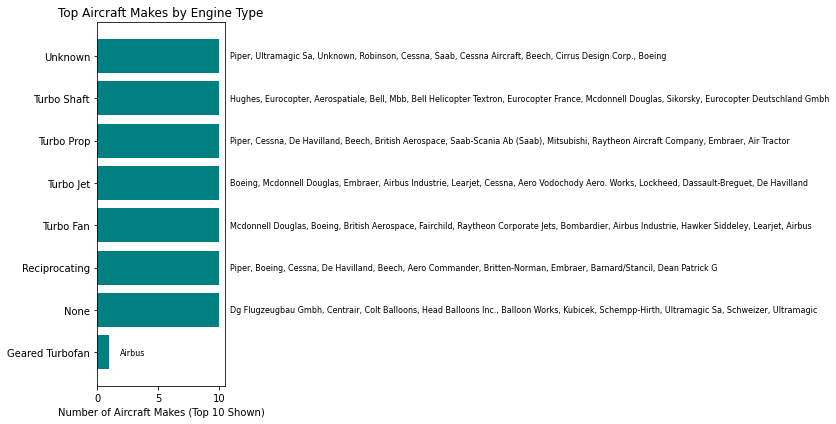

In [34]:
# Illustrate our findings in a horizontal bar graph (but since the figure is huge, we will plot the first 10 examples of each aircraft by type of engine)

plt.figure(figsize=(12, 6))
for i, engine_type in enumerate(engine_examples_all.index):
    top_aircrafts = engine_examples_all[engine_type][:10]  # only first 10
    plt.barh(i, len(top_aircrafts), color='teal')
    plt.text(len(top_aircrafts)+0.9, i, ', '.join(top_aircrafts), va='center', fontsize=8)

plt.yticks(range(len(engine_examples_all)), engine_examples_all.index)
plt.xlabel("Number of Aircraft Makes (Top 10 Shown)")
plt.title("Top Aircraft Makes by Engine Type")
plt.tight_layout()
plt.show()


Concerning the engines:

Reciprocating engines are simple and very easy to maintain. They are efficient at low speeds and altitudes. They are mostly used for light aircraft and short-range flights. #

Turboprop engines are efficient at medium speeds and are beneficial in regional flights, short to medium haul flights

Tubrojet engines are also good for high speeds but have lesser fuel efficiency that turbofan. They however have less mechanical complexity. They are used for long range flights

#### Objective 2.3: Relation between aircraft make and Safety risk of the aircraft (injury severity, total fatal injuries, total serious injuries). 



In this section, we make several assumptions:

1. The aircraft with the least injury severity is the safest.

2. The aircraft with the least total fatal injuries is safest.

3. The aircraft with the least total serious injuries is safest.StopAsyncIteration


##### 2.3.1 Injury_severity

In [35]:
# For the injury severity, let us look at the frequency of injury severity based on Make
# Group by Injury.Severity and show all aircraft makes for each severity
injury_examples = (
    aviation_data.groupby('Injury.Severity')['Make']
    .unique()  # list all unique aircraft makes per severity
)

# Set max column width to display full content
pd.set_option('display.max_colwidth', None)

# Display
injury_examples
     

Injury.Severity
Fatal        [Piper, Cessna, Eurocopter, Boeing, Beech, British Aerospace, Bell, Aerospatiale, Hawker Beechcraft Corp., Aero Commander, Beechcraft, Robinson, Robinson Helicopter, Raytheon Aircraft Company, Cirrus Design Corp, Kidd Chris, Kaylor J E/Strahlmann R L, Eurocopter France, Wooters, Lancair, Wilson, Piper Aircraft Inc, Ulrich Christen, Mooney, Neiva, Siai-Marchetti, Chech Aircraft Works Spol Sro, Cirrus Design Corp., Dayon, Mcdonnell Douglas, Air Tractor, Emory B. Wood, Aerofab, Dragon Fly Aviation, Carlton M. Cadwell, Tromsness Enterprises Inc, Agusta/Westland, Desalvatore Al, Extra Flugzeugproduktions-Gmbh, Thorp, Eurocopter Deutschland Gmbh, Fairchild Hiller, De Havilland, Grumman American, Aviate, Nolan, Airbus Industrie, Poulin L/Cullen D, Harms Robert M, Socata, Airborne, Mckeehan James F, Helton, Yates, Dehavilland, Aero Vodochody Aero. Works, Snow, Mauck, Schweizer, Douglas A. Pohl, Colyaer Sl, Iversen, Grumman, Hughes, Drochak, Czech Aircraft Works, Sc

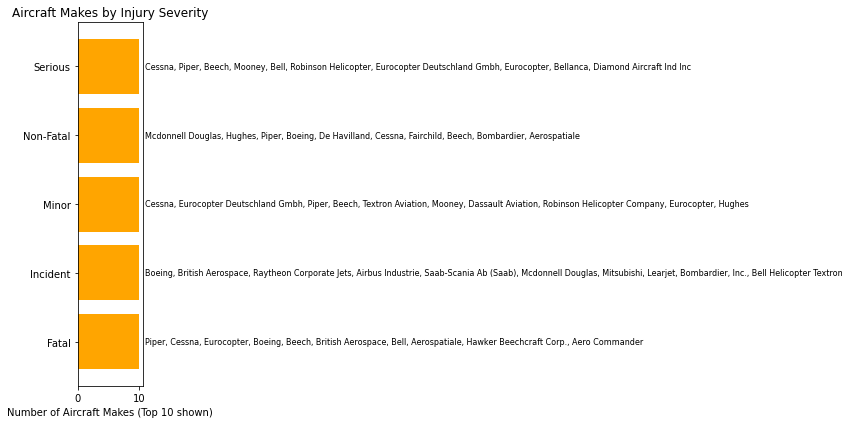

In [36]:
# Illustrate our findings in a horizontal bar graph (but since the figure is huge, we will plot the first 10 aircrafts by injury severity)

plt.figure(figsize=(12, 6))
for i, severity in enumerate(injury_examples.index):
    top_aircrafts = injury_examples[severity][:10]  # show only top 10
    plt.barh(i, len(top_aircrafts), color='orange')
    plt.text(len(top_aircrafts) + 0.9, i, ', '.join(top_aircrafts), va='center', fontsize=8)

plt.yticks(range(len(injury_examples)), injury_examples.index)
plt.xlabel("Number of Aircraft Makes (Top 10 shown)")
plt.title("Aircraft Makes by Injury Severity")
plt.tight_layout()
plt.show()



##### 2.3.2 Total Fatal Injuries

In [37]:
# Group by Make and sum total fatal injuries
fatal_injuries = aviation_data.groupby('Make')['Total.Fatal.Injuries'].sum()

# Group by total fatal injuries and list all aircraft makes for each total
fatal_injury_examples = fatal_injuries.groupby(fatal_injuries).apply(lambda x: list(x.index))

# Set max column width to display full content
pd.set_option('display.max_colwidth', None)

# Display
fatal_injury_examples



Total.Fatal.Injuries
0.0       [2021Fx3 Llc, 737, 781569 Inc, Ab Sportine Aviacija, Abbett Gerry, Adams, Adams Balloons Llc, Adams John R Jr, Adolphson, Aermacchi, Aero At Sp Zoo, Aero Smart Solutions Inc, Aero Sp Z O O, Aero Sp Z O O (Gobosh), Aero Works, Aeromot, Aeropro Cz, Aeros Ltd, Aerospatiale Alenia, Aerosport Ltd, Aerostar Acft Corp Of Texas, Aerostar International, Aerostar International Inc, Aerotek, Aerotrek, Ag-Cat Corporation, Agusta Aerospace Corp, Agustawestland, Agustawestland Philadelphia, Agustawestland Philadelphia Co, Agustawestland Spa, Air Creation Usa Llc, Air Gulfstream Airlines Inc, Air Tractor, Inc., Airborne (Australia), Airborne Australia, Airbus Helicopters Deutschland, Airbus/Eurocopter, Aircraft Industries A.S., Aircraft Mfg & Design Llc, Aircraft Mfg & Dev. Co., Aircraft Mfg & Dev. Co. (Amd), Airframes Unlimited, Airmax Construcoes Aeronautica, Airplane Factory (Pty) Ltd, Albright Stan, Alex Michael Bantum/Tercel Usa, Aliev Bulent, Allen Raymond H, Alli

##### 2.3.3 Total Serious Injuries

In [38]:
# Group by Make and sum total serious injuries
serious_injuries = aviation_data.groupby('Make')['Total.Serious.Injuries'].sum()

# Group by total serious injury count and list all aircraft makes for each
serious_injury_examples = (
    serious_injuries.groupby(serious_injuries)
    .apply(lambda x: list(x.index))  # list all makes with same number of injuries
)

# Ensure full display
pd.set_option('display.max_colwidth', None)

# Display
serious_injury_examples


Total.Serious.Injuries
0.0       [2021Fx3 Llc, 737, Adams, Adams Balloons Llc, Adams John R Jr, Adolphson, Advertising Mgmt & Consulting, Aero Adventure, Aero At Sp Zoo, Aero Sp Z O O (Gobosh), Aero Vodochody, Aero Vodochody Aero. Works, Aero Works, Aerofab, Aerofab Inc, Aeromot, Aeros Ltd, Aerosport Ltd, Aerostar Aircraft Corporation, Aerostar S A, Aerotek, Aerotrek, Aerovodochody, Ag-Cat Corporation, Agusta Aerospace Corp, Agusta Spa, Agusta/Westland, Agustawestland, Agustawestland Philadelphia, Agustawestland Philadelphia Co, Agustawestland Spa, Air Gulfstream Airlines Inc, Air Tractor, Inc., Airborne, Airborne (Australia), Airborne Australia, Airborne Windsport, Airborne Windsports, Airbus Helicopters (Eurocopte, Airbus Helicopters Inc, Airbus/Eurocopter, Aircraft Industries A.S., Aircraft Mfg & Design Llc, Aircraft Mfg & Dev. Co., Airframes Unlimited, Airmax Construcoes Aeronautica, Airplane Factory (Pty) Ltd, Albright Stan, Alex Michael Bantum/Tercel Usa, Alexander, Alexander Sch

#### Objective 2.4: Relation between aircraft make and Mechanical reliability and environmental susceptibility of the aircraft (aircraft damage)

In [39]:
# In the case of damage, the company needs to be aware of the extent of damage to the aircraft. To do this, we will look at the relation between Make (the least logged in) and mechanical reliability

# Group aircraft makes by damage type and list all makes per damage
damage_examples = (
    aviation_data.groupby('Aircraft.damage')['Make']
    .unique()  # get unique aircraft makes per damage type
    .apply(list)  # convert to list for easier display
)

# Set max column width to display full content
pd.set_option('display.max_colwidth', None)

# Display the table
damage_examples


Aircraft.damage
Destroyed                                                                                                                                                                                                                                                               [Piper, Cessna, Eurocopter, Boeing, Beech, British Aerospace, Bell, Robinson Helicopter, Cirrus Design Corp, Kidd Chris, Lancair, Ulrich Christen, Mooney, Neiva, Cirrus Design Corp., Mcdonnell Douglas, Air Tractor, Carlton M. Cadwell, Robinson, Tromsness Enterprises Inc, Agusta/Westland, Desalvatore Al, Eurocopter Deutschland Gmbh, Fairchild Hiller, Grumman American, Aerospatiale, Rotorway, Sikorsky, Poulin L/Cullen D, Harms Robert M, Aero Commander, Airbus Industrie, Helton, Grumman, Schweizer, Raytheon Aircraft Company, Iversen, Hughes, Schempp-Hirth, Raytheon Corporate Jets, Long, Dickey, Socata, Lockheed, Gulfstream American Corp, Piper Aerostar, Learjet, Nagel, Sproul, Maule, Rans, Silfvast, Universal, Air

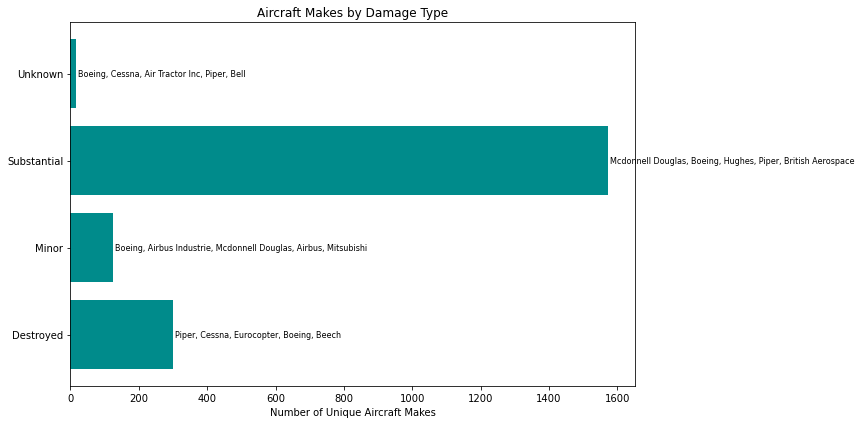

In [40]:
# Illustrate in a horizontal bar graph (but since the figure is huge, we will plot the first 10 aircrafts by level of aircraft damage)
plt.figure(figsize=(12,6))

for i, damage in enumerate(damage_examples.index):
    top_aircrafts = damage_examples[damage][:5]  # show top 5 for readability
    plt.barh(i, len(damage_examples[damage]), color='darkcyan')
    plt.text(len(damage_examples[damage]) + 5.0, i, ', '.join(top_aircrafts), va='center', fontsize=8)

plt.yticks(range(len(damage_examples)), damage_examples.index)
plt.xlabel("Number of Unique Aircraft Makes")
plt.title("Aircraft Makes by Damage Type")
plt.tight_layout()
plt.show()


This marks the end of our analysis based on the objectives we had formulated in the beginning.

## 5. Recommendations

To finally recommend which aircraft would be the best to purchase, we will divide the crafts into:

a. For the safe planes (those which had the least number of crashes which we deemed as safest), we want to known those that are useful for: 

    Personal 

    Business

    Other Work Use

    Executive/corporate

    Public Aircraft - Local 

    Public Aircraft - State

In each, we want to categorize:

1. Which is good for short, medium or long range flights based on engine type.
    
2. From this list, we want those with less injuries + less total fatal injuries + less total serious injuries (meaning less people succumbed) and: 

3. From the above list, we want those with minor aircraft damage (meaning they are mechanically and structurally sound)

In [41]:
# To do the above, we will first define a function 

def get_safe_planes(data, makes, purpose, engine_type,
                    injury_severity='Non-Fatal', max_fatal=5, max_serious=5,
                    damage='Minor'):
    """
    Returns aircraft makes that meet safety criteria for a given make, purpose, and engine type.
    
    Parameters:
        data (DataFrame): Aviation dataset.
        makes (list or str): Aircraft makes to include.
        purpose (str): Purpose of flight to filter.
        engine_type (str): Engine type to filter.
        injury_severity (str): Injury severity to filter (default 'Non-Fatal').
        max_fatal (int): Maximum allowed total fatal injuries (default 5).
        max_serious (int): Maximum allowed total serious injuries (default 5).
        damage (str): Aircraft damage category (default 'Minor').
    
    Returns:
        list: List of aircraft makes that meet the criteria.
    """
    if isinstance(makes, str):
        makes = [makes]  # convert single make to list
    
    filtered = data[
        (data['Make'].isin(makes)) &
        (data['Purpose.of.flight'] == purpose) &
        (data['Engine.Type'] == engine_type) &
        (data['Injury.Severity'] == injury_severity) &
        (data['Total.Fatal.Injuries'] < max_fatal) &
        (data['Total.Serious.Injuries'] < max_serious) &
        (data['Aircraft.damage'] == damage)
    ]
    
    return filtered['Make'].tolist()




In [42]:
# Let us attempt all sorts of combinations to get the best version of planes suited for a variety of purposes.of.flight as well as based on different engine.types
# We shall use a nested for loop for this:

# Lists of purposes and engine types
purposes = [
    'Personal', 
    'Business',  
    'Other Work Use', 
    'Executive/corporate', 
    'Public Aircraft - Local', 
    'Public Aircraft - State'
]

engine_types = [
    'Reciprocating', 
    'Turbo Prop', 
    'Turbo Shaft', 
    'Turbo Fan', 
    'Turbo Jet'
]

# Dictionary to store results
safe_planes_dict = {}

# Loop through all combinations
for purpose in purposes:
    for engine in engine_types:
        key = (purpose, engine)  # use tuple as dictionary key
        safe_planes_list = get_safe_planes(
            aviation_data,
            makes=safe_planes,
            purpose=purpose,
            engine_type=engine
        )
        safe_planes_dict[key] = safe_planes_list

# Print all combinations
for k, v in safe_planes_dict.items():
    print(f"{k}: {v}")


('Personal', 'Reciprocating'): ['T Bird', 'Rolladen-Schneider Ohg', 'Univar', 'Krusmark David Homer', 'Starduster Ii', 'Mueller Michael Walter', 'Schleicher Alexander', 'Boeing 777-306Er', 'Consolidated Vultee', 'Dji', 'Honda']
('Personal', 'Turbo Prop'): ['Evo13 Llc', 'Short Brothers & Harland Ltd.']
('Personal', 'Turbo Shaft'): []
('Personal', 'Turbo Fan'): ['Mcdonnell-Douglas', 'Bombardier Learjet Corp.', 'Boeing Company, Long Beach Div', 'Bae Systems (Operations) Limit', 'Avro']
('Personal', 'Turbo Jet'): ['Gulfstream American Corp.']
('Business', 'Reciprocating'): []
('Business', 'Turbo Prop'): []
('Business', 'Turbo Shaft'): []
('Business', 'Turbo Fan'): []
('Business', 'Turbo Jet'): []
('Other Work Use', 'Reciprocating'): ['Ultramagic S A']
('Other Work Use', 'Turbo Prop'): []
('Other Work Use', 'Turbo Shaft'): []
('Other Work Use', 'Turbo Fan'): []
('Other Work Use', 'Turbo Jet'): []
('Executive/corporate', 'Reciprocating'): []
('Executive/corporate', 'Turbo Prop'): []
('Execut

From our dataset, it appears that the safest plane (one with the least number of accidents) were purposefully used for personal flights. These had the least number of fatal injuries, serious injuries while having a non-fatal injury severity and minor aircraft accidents.

In addition to the above, if the company wishes to procure a plane for long range flights, the 'GulfStream American Corp'. is the best.

For medium range flights, the 'Evo13 Llc', 'Short Brothers' & 'Harland Ltd' are the best options.

For short range flights, the 'T Bird', 'Rolladen-Schneider Ohg', 'Univar', 'Krusmark David Homer', 'Starduster Ii', 'Mueller Michael Walter', 'Schleicher Alexander', 'Boeing 777-306Er', 'Consolidated Vultee', 'Dji', 'Honda' are the best options.

## 6. Conclusions

In this notebook, we were able to suggest the most operational, safe and mechanically reliable plane for procurement for our company using data from the NTSB report of accidents from 1962 - 2023.

Suggestions for further study: Despite having analyzed this dataset to suggest which aircrafts Makes had the least air crashes while still being most operational, safe and mechanically sound, the best suggestions would have come from a dataset of commonly used aircrafts for better predictions.

In [43]:
#To finalize the creation of the Tableau images, we need to use the Cleaned excel sheet since Tableau does not work on files with missing data

aviation_data.to_excel('aviation_data_cleaned.xlsx')

We finalized our analysis by creating a dashboard in Tableau summarizing the Airplane Makes that are:

1. Most operational based on engine type.

2. Safest based on having the least total fatal injuries.

3. Mechanically stable based on having a non-fatal injury severity.